In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import seaborn as sns
import pandas as pd
import dabest

from scipy import stats

In [2]:
os.chdir('LFP-Data/Processed/')
ctrl_lfp = np.load('Ctrl-LFP-40Hz.npy')
variant_lfps = np.load('CA-Variants-LFP-40Hz.npy')
variant_hcn_lfps = np.load('HCN-Variants-LFP-40Hz.npy')
variant_scn_lfps = np.load('SCN-Variants-LFP-40Hz.npy')
variant_combinations_lfps = np.load('Combinations-LFP-40Hz.npy')
gmax_lfps = np.load('Gmax-LFP-40Hz.npy')
ipsc_lfps = np.load('Ipsc-LFP-40Hz.npy')
os.chdir('../../')


os.chdir('PSD-Data/')
ctrl_psd = np.load('Ctrl-PSD-40Hz.npy')
variant_psds = np.load('CA-Variants-PSD-40Hz.npy')
variant_hcn_psds = np.load('HCN-Variants-PSD-40Hz.npy')
variant_scn_psds = np.load('SCN-Variants-PSD-40Hz.npy')
variant_combinations_psds = np.load('Combinations-PSD-40Hz.npy')
gmax_psds = np.load('Gmax-PSD-40Hz.npy')
ipsc_psds = np.load('Ipsc-PSD-40Hz.npy')
freqs = np.load('PSD-40Hz-Frequencies.npy')
os.chdir('../')


In [3]:
print(len(variant_combinations_lfps))

7


In [4]:
frequencies = [40.0]

n = 256
dt = 0.1
duration = 2000
timepoints = int((duration/dt)/2)
group_average = np.zeros((timepoints,))
fs = 1./dt


time = np.arange(0,timepoints)

u40 = 42
l40 = 38
u20 = 22
l20 = 18
u4  = 6
l4  = 2
u3  = 5
l3  = 1

conn_seeds = np.load('Conn-Seeds.npy')
noise_seeds = np.load('Noise-Seeds.npy')

### Avg LFP Signal - Variants vs Control 

In [5]:
colors =sns.color_palette(n_colors=5,desat=0.5)
rgbs = np.zeros((5,3))
for i,color in enumerate(colors):
    for j,value in enumerate(color):
        value *= 255
        rgbs[i,j]= value
print(rgbs)

[[ 68.25 112.25 142.75]
 [194.75 130.75  74.25]
 [ 73.   131.    73.  ]
 [170.25  82.75  83.25]
 [147.   124.5  167.5 ]]


### Calculate cycle averages

In [6]:
# calculate cycle length, i.e. number of points (40Hz = 25ms per cycle and we average over two consecutive cycles
# i.e. 50ms)
npoints = int(50/dt)

cycle_average_ctrl = np.mean(ctrl_lfp.reshape(-1,npoints),axis=0)
cycle_average_ca7 = np.mean(variant_lfps[6].reshape(-1,npoints),axis=0)
cycle_average_ca74 = np.mean(variant_lfps[73].reshape(-1,npoints),axis=0)
cycle_average_hcn2 = np.mean(variant_hcn_lfps[1].reshape(-1,npoints),axis=0)
#cycle_average_scn1 = np.mean(variant_scn_lfps[0].reshape(-1,npoints),axis=0)


cycle_average_time = np.linspace(-25,25,npoints)


In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(cycle_average_time,cycle_average_ctrl,color=colors[0],linewidth=7.0)
ax.plot(cycle_average_time,cycle_average_ca7,color=colors[1],linewidth=7.0)
ax.plot(cycle_average_time,cycle_average_ca74,color=colors[2],linewidth=7.0)
ax.plot(cycle_average_time,cycle_average_hcn2,color=colors[3],linewidth=7.0)
ax.set_xlabel('Time (ms)',fontsize=36.0)
ax.set_ylabel('LFP (uV)',fontsize=36.0)
ax.tick_params(axis='both',labelsize=18.0)  
#filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/Cycle-average-LFP-single-variant.eps'
#plt.savefig(filenameeps,dpi=600)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(cycle_average_time,cycle_average_ctrl,color=colors[0],linewidth=8.0)
ax.plot(cycle_average_time,cycle_average_ca6,color=colors[1],linewidth=8.0)
ax.set_xlabel('Time',fontsize=36.0)
ax.set_ylabel('LFP',fontsize=36.0)
ax.tick_params(axis='both',labelsize=18.0)  
ax.set_xlim([0,6])
filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/Cycle-average-LFP-single-variant-zoom.eps'
plt.savefig(filenameeps,dpi=600)

### PSD of Avg LFP Signal - Variants vs Control 

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.plot(freqs*1000,variant_psds[6,:])
ax.plot(freqs*1000,variant_psds[74,:])
ax.plot(freqs*1000,variant_hcn_psds[1,:])
for i in range(4):
    ax.plot(freqs*1000,variant_combinations_psds[i,:])
for i in range(3):
    ax.plot(freqs*1000,gmax_psds[i,:])
for i in range(3):
    ax.plot(freqs*1000,ipsc_psds[i,:])
ax.plot(freqs*1000,ctrl_psd,'k',linewidth=3.0)
ax.set_xlabel('Time',fontsize=36.0)
ax.set_ylabel('PSD',fontsize=36.0)
ax.tick_params(axis='both',labelsize=18.0)  
ax.set_xlim([0,50])
filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/Single-Variants-4040-Total-PSD.eps'
plt.savefig(filenameeps,dpi=600)

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.plot(freqs*1000,variant_psds[6,:])
ax.plot(freqs*1000,variant_psds[74,:])
ax.plot(freqs*1000,variant_hcn_psds[1,:])
for i in range(4):
    ax.plot(freqs*1000,variant_combinations_psds[i,:])
for i in range(3):
    ax.plot(freqs*1000,gmax_psds[i,:])
for i in range(3):
    ax.plot(freqs*1000,ipsc_psds[i,:])
ax.plot(freqs*1000,ctrl_psd,'k',linewidth=3.0)
ax.set_xlabel('Time',fontsize=36.0)
ax.set_ylabel('PSD',fontsize=36.0)
ax.tick_params(axis='both',labelsize=18.0)  
ax.set_xlim([39,41])
filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/Single-Variants-4040-Total-PSD-Zoom.eps'
plt.savefig(filenameeps,dpi=600)

### Box plots

In [8]:
labels = ['C1','C4','C5']
labels_g = ['gmax25', 'gmax50', 'gmax75']
labels_i = ['ipsc18', 'ipsc25', 'ipsc32']

# Load individual subject data
variants_lfps = np.zeros((76,20,timepoints))
variants_hcn_lfps = np.zeros((4,20,timepoints))
variants_combinations_lfps = np.zeros((5,20,timepoints))
gmax_lfps = np.zeros((3,20,timepoints))
ipsc_lfps = np.zeros((3,20,timepoints))
os.chdir('LFP-Data/Processed/')
ctrl_lfps = np.load('Ctrl-Subjects-LFPs-40Hz.npy')
for j in range(0,76):
    variants_lfps[j,:,:] = np.load('VAR'+str(j)+'-Subjects-LFPs-40Hz.npy')
for j in range(0,4):
    variants_hcn_lfps[j,:,:] = np.load('HCN_VAR'+str(j)+'-Subjects-LFPs-40Hz.npy')
for label in labels:
    variants_combinations_lfps[j,:,:] = np.load(label+'-Subjects-LFPs-40Hz.npy')
for j,label in enumerate(labels_g):
    gmax_lfps[j,:,:] = np.load(label+'-Subjects-LFPs-40Hz.npy')
for j,label in enumerate(labels_i):
    ipsc_lfps[j,:,:] = np.load(label+'-Subjects-LFPs-40Hz.npy')
os.chdir('../../')

variants_psds = np.zeros((76,20,int(timepoints/2)+1))
variants_hcn_psds = np.zeros((4,20,int(timepoints/2)+1))
variants_combinations_psds = np.zeros((5,20,int(timepoints/2)+1))
gmax_psds = np.zeros((3,20,int(timepoints/2)+1))
ipsc_psds = np.zeros((3,20,int(timepoints/2)+1))
os.chdir('PSD-Data/')
ctrl_psds = np.load('Ctrl-Subjects-PSDs-40Hz.npy')
freqs = np.load('PSD-40Hz-Frequencies.npy')
for j in range(0,76):
    variants_psds[j,:,:] = np.load('VAR'+str(j)+'-Subjects-PSDs-40Hz.npy')
for j in range(0,4):
    variants_hcn_psds[j,:,:] = np.load('HCN_VAR'+str(j)+'-Subjects-PSDs-40Hz.npy')
for j,label in enumerate(labels):
    variants_combinations_psds[j,:,:] = np.load(label+'-Subjects-PSDs-40Hz.npy')
for j,label in enumerate(labels_g):
    gmax_psds[j,:,:] = np.load(label+'-Subjects-PSDs-40Hz.npy')
for j,label in enumerate(labels_i):
    ipsc_psds[j,:,:] = np.load(label+'-Subjects-PSDs-40Hz.npy')
os.chdir('../')

In [9]:
twenties_ctrl = np.zeros((20,))
forties_ctrl = np.zeros((20,))

for i,cs in enumerate(conn_seeds):
   
    forties_ctrl[i]  = np.sum(ctrl_psds[i,l40:u40])
    twenties_ctrl[i] = np.sum(ctrl_psds[i,l20:u20])

    
group_power_4040_ctrl = forties_ctrl[:]
group_power_2040_ctrl = twenties_ctrl[:]

In [10]:
group_power_4040_variants = np.zeros((76,20))
group_power_2040_variants = np.zeros((76,20))

for j in range(0,76):
    for i,cs in enumerate(conn_seeds):
        group_power_4040_variants[j,i]  = np.sum(variants_psds[j,i,l40:u40])
        group_power_2040_variants[j,i]  = np.sum(variants_psds[j,i,l20:u20])

In [11]:
group_power_4040_variants_hcn = np.zeros((4,20))
group_power_2040_variants_hcn = np.zeros((4,20))

for j in range(0,4):
    for i,cs in enumerate(conn_seeds):
        group_power_4040_variants_hcn[j,i]  = np.sum(variants_hcn_psds[j,i,l40:u40])
        group_power_2040_variants_hcn[j,i]  = np.sum(variants_hcn_psds[j,i,l20:u20])

In [12]:
group_power_4040_variants_combinations = np.zeros((3,20))
group_power_2040_variants_combinations = np.zeros((3,20))

for j in range(0,3):
    for i,cs in enumerate(conn_seeds):
        group_power_4040_variants_combinations[j,i]  = np.sum(variants_combinations_psds[j,i,l40:u40])
        group_power_2040_variants_combinations[j,i]  = np.sum(variants_combinations_psds[j,i,l20:u20])

In [13]:
group_power_4040_gmax = np.zeros((5,20))
group_power_2040_gmax = np.zeros((5,20))

for j in range(0,3):
    for i,cs in enumerate(conn_seeds):
        group_power_4040_gmax[j,i]  = np.sum(gmax_psds[j,i,l40:u40])
        group_power_2040_gmax[j,i]  = np.sum(gmax_psds[j,i,l20:u20])

In [14]:
group_power_4040_ipsc = np.zeros((5,20))
group_power_2040_ipsc = np.zeros((5,20))

for j in range(0,3):
    for i,cs in enumerate(conn_seeds):
        group_power_4040_ipsc[j,i]  = np.sum(ipsc_psds[j,i,l40:u40])
        group_power_2040_ipsc[j,i]  = np.sum(ipsc_psds[j,i,l20:u20])

### Estimation plots

#### Figure 3

In [15]:
f3 = {'Ctrl': group_power_4040_ctrl,
      'Ca7': group_power_4040_variants[6,:],
      'Ca74': group_power_4040_variants[73,:],
      'HCN2': group_power_4040_variants_hcn[1,:],}
f3_df = pd.DataFrame(f3)
f3_dabest = dabest.load(f3_df,idx=("Ctrl", "Ca7", "Ca74", "HCN2"), resamples=5000)

In [16]:
f3_dabest

DABEST v0.3.0
             
Good afternoon!
The current time is Thu Sep 24 14:58:24 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. Ca7 minus Ctrl
2. Ca74 minus Ctrl
3. HCN2 minus Ctrl

5000 resamples will be used to generate the effect size bootstraps.

In [17]:
f3_dabest.mean_diff

DABEST v0.3.0
             
Good afternoon!
The current time is Thu Sep 24 14:58:27 2020.

The unpaired mean difference between Ctrl and Ca7 is -29.5 [95%CI -30.9, -28.2].
The p-value of the two-sided permutation t-test is 0.0. 

The unpaired mean difference between Ctrl and Ca74 is -16.7 [95%CI -18.1, -15.2].
The p-value of the two-sided permutation t-test is 0.0. 

The unpaired mean difference between Ctrl and HCN2 is -21.9 [95%CI -23.2, -20.5].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

/home/cmetzner/miniconda3/envs/neurolib/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


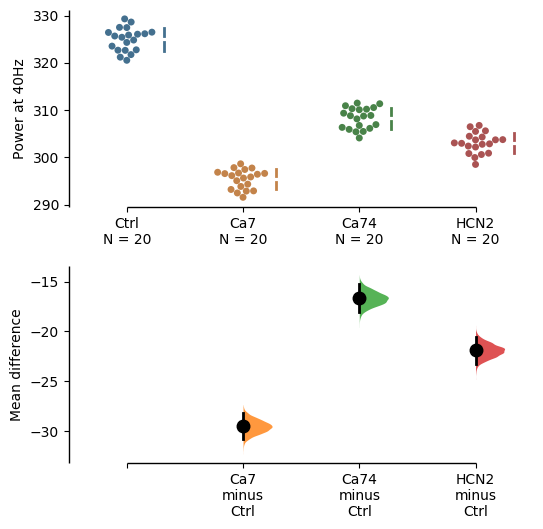

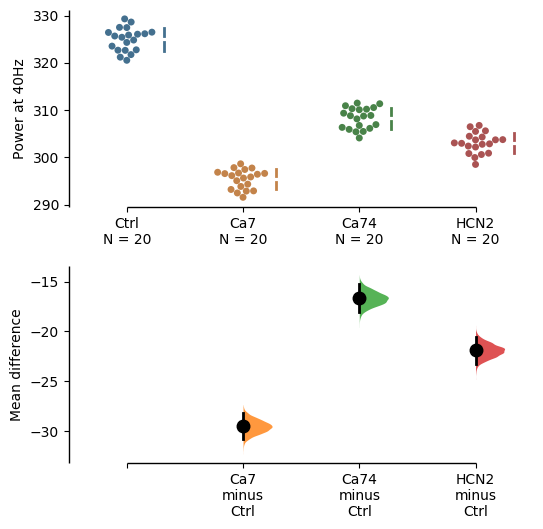

In [18]:
f3_dabest.mean_diff.plot(swarm_label='Power at 40Hz',raw_marker_size=5)

### Combine Figure 3

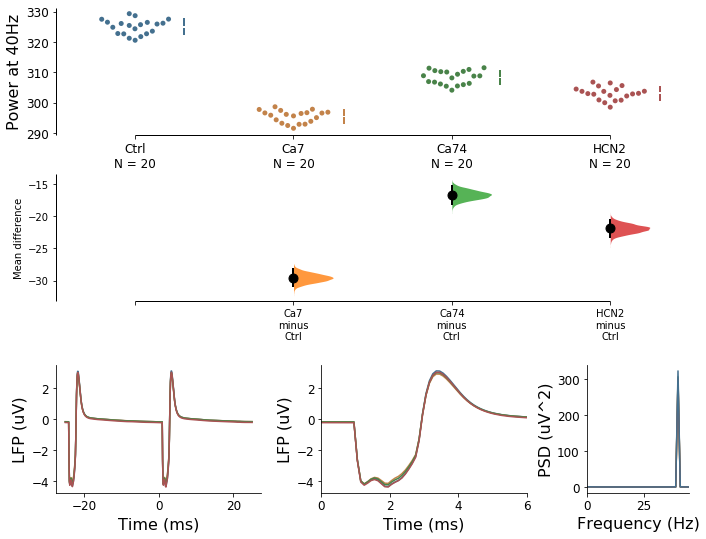

In [19]:
#f, axx = plt.subplots(nrows=2, ncols =3, figsize=(20,15))
f = plt.figure(figsize=(10,8))
outer_grid = f.add_gridspec(3,1)
inner0 = outer_grid[0:1].subgridspec(1,2)
inner1 = outer_grid[2:].subgridspec(1,3,wspace=0.35,width_ratios=[2,2,1])
ax0 = f.add_subplot(inner0[0:])
fig =f3_dabest.mean_diff.plot(swarm_label='Power at 40Hz',raw_marker_size=5,ax=ax0)
axs =  fig.axes
#ax0.tick_params(axis='both',labelsize=16.0)
#ax0.set_ylabel('Power at 40Hz',fontsize=20.0)
axs[0].tick_params(axis='both',labelsize=12.0)
axs[0].set_ylabel('Power at 40Hz',fontsize=16.0)
ax1 = f.add_subplot(inner1[0])
ax1.plot(cycle_average_time,cycle_average_ctrl,color=colors[0],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_ca7,color=colors[1],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_ca74,color=colors[2],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_hcn2,color=colors[3],linewidth=1.5)
ax1.set_xlabel('Time (ms)',fontsize=16.0)
ax1.set_ylabel('LFP (uV)',fontsize=16.0)
ax1.tick_params(axis='both',labelsize=12.0)  
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2 = f.add_subplot(inner1[1])
ax2.plot(cycle_average_time,cycle_average_ctrl,color=colors[0],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_ca7,color=colors[1],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_ca74,color=colors[2],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_hcn2,color=colors[3],linewidth=1.5)
ax2.set_xlabel('Time (ms)',fontsize=16.0)
ax2.set_ylabel('LFP (uV)',fontsize=16.0)
ax2.tick_params(axis='both',labelsize=12.0)  
ax2.set_xlim([0,6])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3 = f.add_subplot(inner1[2])
ax3.plot(freqs*1000,variant_psds[6,:],color=colors[1],linewidth=1.5)
ax3.plot(freqs*1000,variant_psds[73,:],color=colors[2],linewidth=1.5)
ax3.plot(freqs*1000,variant_hcn_psds[1,:],color=colors[3],linewidth=1.5)
ax3.plot(freqs*1000,ctrl_psd,color=colors[0],linewidth=1.5)
ax3.set_xlabel('Frequency (Hz)',fontsize=16.0)
ax3.set_ylabel('PSD (uV^2)',fontsize=16.0)
ax3.tick_params(axis='both',labelsize=12.0)  
ax3.set_xlim([0,45])
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

plt.tight_layout()
filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/Figure3.eps'
plt.savefig(filenameeps,dpi=600)

#### Combine Figure 4

In [20]:
# calculate cycle length, i.e. number of points (40Hz = 25ms per cycle and we average over two consecutive cycles
# i.e. 50ms)
npoints = int(50/dt)

cycle_average_comb1 = np.mean(variant_combinations_lfps[0].reshape(-1,npoints),axis=0)
cycle_average_comb2 = np.mean(variant_combinations_lfps[3].reshape(-1,npoints),axis=0)
cycle_average_comb3 = np.mean(variant_combinations_lfps[4].reshape(-1,npoints),axis=0)

cycle_average_time = np.linspace(-25,25,npoints)

In [21]:
f4 = {'Ctrl': group_power_4040_ctrl,
      'Ca7': group_power_4040_variants[6,:],
      'Comb1': group_power_4040_variants_combinations[0,:],
      'Comb2': group_power_4040_variants_combinations[1,:],
      'Comb3': group_power_4040_variants_combinations[2,:]}
f4_df = pd.DataFrame(f4)
f4_dabest = dabest.load(f4_df,idx=("Ctrl", "Ca7", "Comb1", "Comb2","Comb3"), resamples=5000)

In [22]:
f4_dabest

DABEST v0.3.0
             
Good afternoon!
The current time is Thu Sep 24 14:59:58 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. Ca7 minus Ctrl
2. Comb1 minus Ctrl
3. Comb2 minus Ctrl
4. Comb3 minus Ctrl

5000 resamples will be used to generate the effect size bootstraps.

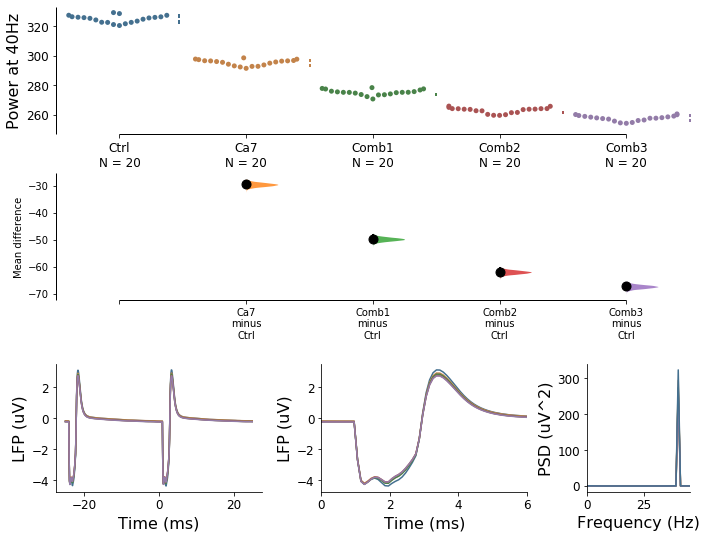

In [23]:
f = plt.figure(figsize=(10,8))
outer_grid = f.add_gridspec(3,1)
inner0 = outer_grid[0:1].subgridspec(1,2)
inner1 = outer_grid[2:].subgridspec(1,3,wspace=0.35,width_ratios=[2,2,1])
ax0 = f.add_subplot(inner0[0:])
fig =f4_dabest.mean_diff.plot(swarm_label='Power at 40Hz',raw_marker_size=5,ax=ax0)
axs =  fig.axes
#ax0.tick_params(axis='both',labelsize=16.0)
#ax0.set_ylabel('Power at 40Hz',fontsize=20.0)
axs[0].tick_params(axis='both',labelsize=12.0)
axs[0].set_ylabel('Power at 40Hz',fontsize=16.0)
ax1 = f.add_subplot(inner1[0])
ax1.plot(cycle_average_time,cycle_average_ctrl,color=colors[0],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_ca7,color=colors[1],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_comb1,color=colors[2],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_comb2,color=colors[3],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_comb3,color=colors[4],linewidth=1.5)
ax1.set_xlabel('Time (ms)',fontsize=16.0)
ax1.set_ylabel('LFP (uV)',fontsize=16.0)
ax1.tick_params(axis='both',labelsize=12.0)  
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2 = f.add_subplot(inner1[1])
ax2.plot(cycle_average_time,cycle_average_ctrl,color=colors[0],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_ca7,color=colors[1],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_comb1,color=colors[2],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_comb2,color=colors[3],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_comb3,color=colors[4],linewidth=1.5)
ax2.set_xlabel('Time (ms)',fontsize=16.0)
ax2.set_ylabel('LFP (uV)',fontsize=16.0)
ax2.tick_params(axis='both',labelsize=12.0)  
ax2.set_xlim([0,6])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3 = f.add_subplot(inner1[2])
ax3.plot(freqs*1000,variant_psds[6,:],color=colors[1],linewidth=1.5)
ax3.plot(freqs*1000,variant_combinations_psds[0,:],color=colors[2],linewidth=1.5)
ax3.plot(freqs*1000,variant_combinations_psds[3,:],color=colors[3],linewidth=1.5)
ax3.plot(freqs*1000,variant_combinations_psds[4,:],color=colors[4],linewidth=1.5)
ax3.plot(freqs*1000,ctrl_psd,color=colors[0],linewidth=1.5)
ax3.set_xlabel('Frequency (Hz)',fontsize=16.0)
ax3.set_ylabel('PSD (uV^2)',fontsize=16.0)
ax3.tick_params(axis='both',labelsize=12.0)  
ax3.set_xlim([0,45])
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

plt.tight_layout()
filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/Figure4.eps'
plt.savefig(filenameeps,dpi=600)

#### Combine Figure 5

In [24]:
npoints = int(50/dt)

cycle_average_gmax = np.mean(gmax_lfps[0].reshape(-1,npoints),axis=0)
cycle_average_ipsc = np.mean(ipsc_lfps[0].reshape(-1,npoints),axis=0)

In [25]:
f5 = {'Ctrl': group_power_4040_ctrl,
      'Ca7': group_power_4040_variants[6,:],
      'Comb3': group_power_4040_variants_combinations[2,:],
      'Gmax': group_power_4040_gmax[0,:],
      'IPSC': group_power_4040_ipsc[0,:]}
f5_df = pd.DataFrame(f5)
f5_dabest = dabest.load(f5_df,idx=("Ctrl", "Ca7", "Comb3", "Gmax","IPSC"), resamples=5000)

In [26]:
f5_dabest

DABEST v0.3.0
             
Good afternoon!
The current time is Thu Sep 24 15:01:36 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. Ca7 minus Ctrl
2. Comb3 minus Ctrl
3. Gmax minus Ctrl
4. IPSC minus Ctrl

5000 resamples will be used to generate the effect size bootstraps.

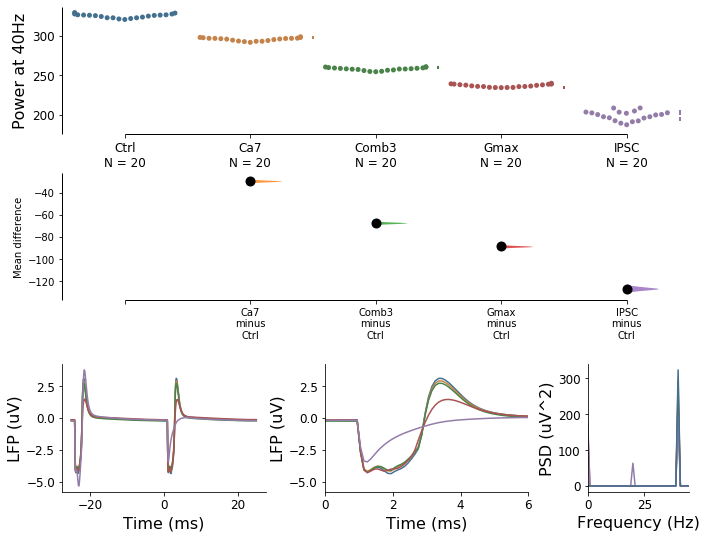

In [27]:
f = plt.figure(figsize=(10,8))
outer_grid = f.add_gridspec(3,1)
inner0 = outer_grid[0:1].subgridspec(1,2)
inner1 = outer_grid[2:].subgridspec(1,3,wspace=0.35,width_ratios=[2,2,1])
ax0 = f.add_subplot(inner0[0:])
fig =f5_dabest.mean_diff.plot(swarm_label='Power at 40Hz',raw_marker_size=5,ax=ax0)
axs =  fig.axes
#ax0.tick_params(axis='both',labelsize=16.0)
#ax0.set_ylabel('Power at 40Hz',fontsize=20.0)
axs[0].tick_params(axis='both',labelsize=12.0)
axs[0].set_ylabel('Power at 40Hz',fontsize=16.0)
ax1 = f.add_subplot(inner1[0])
ax1.plot(cycle_average_time,cycle_average_ctrl,color=colors[0],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_ca7,color=colors[1],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_comb3,color=colors[2],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_gmax,color=colors[3],linewidth=1.5)
ax1.plot(cycle_average_time,cycle_average_ipsc,color=colors[4],linewidth=1.5)
ax1.set_xlabel('Time (ms)',fontsize=16.0)
ax1.set_ylabel('LFP (uV)',fontsize=16.0)
ax1.tick_params(axis='both',labelsize=12.0)  
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2 = f.add_subplot(inner1[1])
ax2.plot(cycle_average_time,cycle_average_ctrl,color=colors[0],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_ca7,color=colors[1],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_comb3,color=colors[2],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_gmax,color=colors[3],linewidth=1.5)
ax2.plot(cycle_average_time,cycle_average_ipsc,color=colors[4],linewidth=1.5)
ax2.set_xlabel('Time (ms)',fontsize=16.0)
ax2.set_ylabel('LFP (uV)',fontsize=16.0)
ax2.tick_params(axis='both',labelsize=12.0)  
ax2.set_xlim([0,6])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3 = f.add_subplot(inner1[2])
ax3.plot(freqs*1000,variant_psds[6,:],color=colors[1],linewidth=1.5)
ax3.plot(freqs*1000,variant_combinations_psds[3,:],color=colors[2],linewidth=1.5)
ax3.plot(freqs*1000,gmax_psds[0,0,:],color=colors[3],linewidth=1.5)
ax3.plot(freqs*1000,ipsc_psds[0,0,:],color=colors[4],linewidth=1.5)
ax3.plot(freqs*1000,ctrl_psd,color=colors[0],linewidth=1.5)
ax3.set_xlabel('Frequency (Hz)',fontsize=16.0)
ax3.set_ylabel('PSD (uV^2)',fontsize=16.0)
ax3.tick_params(axis='both',labelsize=12.0)  
ax3.set_xlim([0,45])
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

plt.tight_layout()
filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/Figure5.eps'
plt.savefig(filenameeps,dpi=600)

### 4040 Power - Variants vs Control

In [ ]:
plotdata = [group_power_4040_ctrl]
labels = ['Ctrl'] 
plotdata.append(group_power_4040_variants[6,:])
labels.append('CA7')
plotdata.append(group_power_4040_variants[74,:])
labels.append('CA75')
plotdata.append(group_power_4040_variants_hcn[1,:])
labels.append('HCN2')
for i in range(0,4):
    plotdata.append(group_power_4040_variants_combinations[i,:])
    label = 'Comb'+str(i+1)
    labels.append(label)
#for i in range(0,3): # only use Gmax 25%
plotdata.append(group_power_4040_gmax[0,:])
label = 'Gmax'+str(25)
labels.append(label)
#for i in range(0,3): # only use IPSC25
plotdata.append(group_power_4040_ipsc[0,:])
label = 'IPSC'+str(25)
labels.append(label)

    
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

medianprops = dict(linestyle='-', linewidth=1.0, color='0.5') 
bp=ax.boxplot(plotdata,medianprops=medianprops)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='0.5', marker='+')
ax.set_xlabel('Condition',fontsize=36.0)
ax.set_ylabel('Power at 40Hz',fontsize=36.0)
ax.set_xticklabels(labels)
ax.tick_params(axis='x',labelsize=24.0)
ax.tick_params(axis='y',labelsize=24.0)
ax.set_title('Variant Effects',fontsize=40.0)
#ax.set_ylim([-100.0, 8100.0])
#if save:
filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/4040.eps'
plt.savefig(filenameeps,dpi=600)

### 2040 Power - Variants vs Control

In [ ]:
plotdata = [group_power_2040_ctrl]
labels = ['Ctrl'] 
plotdata.append(group_power_2040_variants[6,:])
labels.append('CA7')
plotdata.append(group_power_2040_variants[74,:])
labels.append('CA75')
plotdata.append(group_power_2040_variants_hcn[1,:])
labels.append('HCN2')
for i in range(0,4):
    plotdata.append(group_power_2040_variants_combinations[i,:])
    label = 'Comb'+str(i+1)
    labels.append(label)
#for i in range(0,3): # only use Gmax 25%
plotdata.append(group_power_2040_gmax[0,:])
label = 'Gmax'+str(25)
labels.append(label)
#for i in range(0,3): # only use IPSC25
plotdata.append(group_power_2040_ipsc[0,:])
label = 'IPSC'+str(25)
labels.append(label)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

medianprops = dict(linestyle='-', linewidth=1.0, color='0.5')
bp=ax.boxplot(plotdata,medianprops=medianprops)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='0.5', marker='+')
ax.set_xlabel('Condition',fontsize=36.0)
ax.set_ylabel('Power at 20Hz',fontsize=36.0)
ax.set_xticklabels(labels)
ax.tick_params(axis='x',labelsize=24.0)
ax.tick_params(axis='y',labelsize=24.0)
#ax.set_ylim([-100.0, 8100.0])
#if save:
filenameeps = '/home/cmetzner/Articles/ACModel/Gene-Variants-and-Gamma/Figures/2040.eps'
plt.savefig(filenameeps,dpi=600)